In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import csv
o = open('laserdata.csv', 'rU')
mydata = csv.reader(o)

laseAngles2 = []
laserDepths = []
for row in mydata:
    laseAngles2.append(float(row[0]))
    laserDepths.append(float(row[1]))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


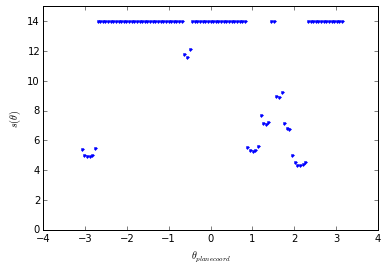

In [57]:
%pylab inline

plt.plot(laseAngles2,laserDepths,'.')
plt.xlabel(r'$\theta_{plane coord}$')
plt.ylabel(r'$s(\theta)$')
plt.axis([-4, 4, 0, 15])
plt.show()

In [58]:
# Approximation of linear combination of three Gaussians (separated by 2pi) over the range [-pi,pi]

from sympy.mpmath import *
I = [-math.pi, math.pi]
N = 22   # number of Fourier-approximation-of-3-Gaussian basis functions
M = 15    # order of Fourier series
sig = 0.1

In [59]:
cslist = []

for i in np.linspace(-3.14,3.14-3.14/11,N):
    print i

    f = lambda x: 2.71 ** (-(x-i)**2 / (2*sig**2)) + 2.71 ** (-(x-i-2*math.pi)**2 / (2*sig**2)) + 2.71 ** (-(x-i+2*math.pi)**2 / (2*sig**2))

    x = np.linspace(-10,10,1000)
    y = f(x) 
    cs = fourier(f, I, M)
    cslist.append(cs)

-3.14
-2.85454545455
-2.56909090909
-2.28363636364
-1.99818181818
-1.71272727273
-1.42727272727
-1.14181818182
-0.856363636364
-0.570909090909
-0.285454545455
0.0
0.285454545455
0.570909090909
0.856363636364
1.14181818182
1.42727272727
1.71272727273
1.99818181818
2.28363636364
2.56909090909
2.85454545455


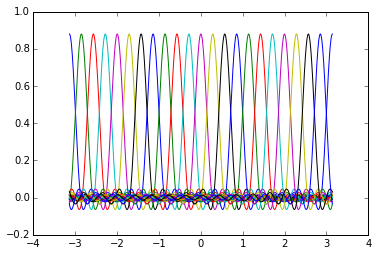

In [60]:
for i in range(len(cslist)):
    cs = cslist[i]
#print cs1
#print len(cs1)
#print len(cs1[0])
#print len(cs1[1])

    def f_basis_practice(x,M):
        b = math.pi
        a = -math.pi
        m = 2.0*math.pi / (b - a)
        y = 0
        for k in range(M+1):

            y = y + cs[0][k] * math.cos(k * m * x)
            y = y + cs[1][k] * math.sin(k * m * x)
        return y

    x = np.linspace(-math.pi,math.pi,1000)
    y = x * 0.0
    for i in range(len(x)):
        y[i] = f_basis_practice(x[i],M)

    plt.plot(x,y)
    
plt.show()

[[  1.00000000e+00  -1.57079633e+00   2.46740110e+00 ...,  -5.32448568e+03
    8.36368255e+03  -1.31376418e+04]
 [  1.00000000e+00  -1.63362818e+00   2.66874103e+00 ...,  -1.12178883e+04
    1.83258584e+04  -2.99376387e+04]
 [  1.00000000e+00  -1.69646003e+00   2.87797664e+00 ...,  -2.29788885e+04
    3.89827659e+04  -6.61327044e+04]
 ..., 
 [  1.00000000e+00  -1.38230077e+00   1.91075541e+00 ...,  -4.69297709e+02
    6.48710584e+02  -8.96713138e+02]
 [  1.00000000e+00  -1.44513262e+00   2.08840829e+00 ...,  -1.09205971e+03
    1.57817110e+03  -2.28066654e+03]
 [  1.00000000e+00  -1.50796447e+00   2.27395685e+00 ...,  -2.45149545e+03
    3.69676804e+03  -5.57459488e+03]]
153.512413685
regression weights for N = 22
[  1.36430263e+01  -9.32061837e-01   8.42908466e+00   2.44061895e+01
  -3.59826738e+01  -8.24755806e+01   3.94678040e+01   9.53763132e+01
  -1.98440812e+01  -5.53861697e+01   5.31027177e+00   1.85970030e+01
  -7.84794903e-01  -3.83957981e+00   5.99387486e-02   4.95591753e-01


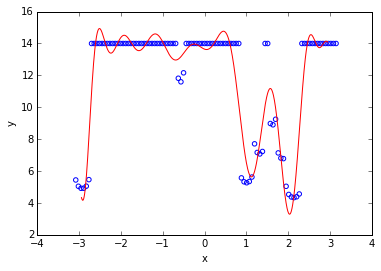

22
22
[<functools.partial object at 0x11c5dbfc8>, <functools.partial object at 0x11c5dbd60>, <functools.partial object at 0x11c5db838>, <functools.partial object at 0x11c5dbec0>, <functools.partial object at 0x11ba8d788>, <functools.partial object at 0x11ba8dc58>, <functools.partial object at 0x11ba8d8e8>, <functools.partial object at 0x11ba8d6d8>, <functools.partial object at 0x11ba8d050>, <functools.partial object at 0x11d91ba48>, <functools.partial object at 0x11d91bd60>, <functools.partial object at 0x11d842f70>, <functools.partial object at 0x11d842fc8>, <functools.partial object at 0x11d842c58>, <functools.partial object at 0x11d842470>, <functools.partial object at 0x11d842940>, <functools.partial object at 0x11d842cb0>, <functools.partial object at 0x11d842e68>, <functools.partial object at 0x11d842260>, <functools.partial object at 0x11d842ec0>, <functools.partial object at 0x11d8421b0>, <functools.partial object at 0x11d842208>]
0


IndexError: list index out of range

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

def plot(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(-math.pi+0.2,math.pi-0.2,1000)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def plotRBFbases(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(-math.pi+0.2,math.pi-0.2,1000)
    reg_prediction = w[0]*lr.bases[0](x) + w[1]*lr.bases[1](x) + w[2]*lr.bases[2](x) + w[3]*lr.bases[3](x) + \
                     w[4]*lr.bases[4](x) + w[5]*lr.bases[5](x) + w[6]*lr.bases[6](x) + w[7]*lr.bases[7](x) + \
                     w[8]*lr.bases[8](x) + w[9]*lr.bases[9](x) + w[10]*lr.bases[10](x) + w[11]*lr.bases[11](x)
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

lr = LinearRegression(laseAngles2,laserDepths,N-1)
w = lr.reg()
print np.matrix(lr.phi)
print lr.SSE(w)
print "regression weights for N = " + str(N)
print w
plot(lr,w)

print len(cslist)

lr = LinearRegression(laseAngles2,laserDepths,N)
lr.setBases(N,cslist)
print len(lr.bases)
print lr.bases
lr.RBF_Phi(N)
w = lr.reg()
print "regression weights for N = " + str(N)
print w
plotRBFbases(lr,w)




regression weights for M = 22
[  3.57392646e-02   1.28118033e-02  -9.60532546e-02  -2.87433904e-01
   4.13665488e-01   9.79752871e-01  -3.64227064e-01  -1.13071726e+00
   9.46549559e-02   6.47758138e-01   2.30204268e-02  -2.12812666e-01
  -2.00158155e-02   4.27470026e-02   5.35559361e-03  -5.34527100e-03
  -7.63673585e-04   4.06232381e-04   6.23166798e-05  -1.71776598e-05
  -2.75660191e-06   3.09936299e-07   5.15201701e-08]


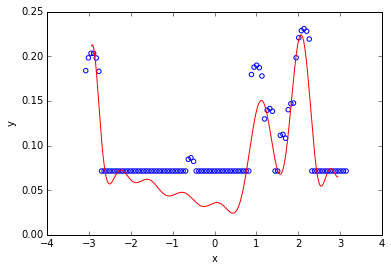

0


IndexError: list index out of range

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

def plot(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(-math.pi+0.2,math.pi-0.2,1000)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def plotRBFbases(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(-math.pi+0.2,math.pi-0.2,1000)
    reg_prediction = w[0]*lr.bases[0](x) + w[1]*lr.bases[1](x) + w[2]*lr.bases[2](x) + w[3]*lr.bases[3](x) + \
                     w[4]*lr.bases[4](x) + w[5]*lr.bases[5](x) + w[6]*lr.bases[6](x) + w[7]*lr.bases[7](x) + \
                     w[8]*lr.bases[8](x) + w[9]*lr.bases[9](x) + w[10]*lr.bases[10](x) + w[11]*lr.bases[11](x)
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

laserDepths2 = np.array(laserDepths) * 0
for i in range(len(laserDepths)):
    laserDepths2[i] = 1.0/laserDepths[i]
    
M = 22
lr = LinearRegression(laseAngles2,laserDepths2,M)
w = lr.reg()
w_initial = 0*np.zeros((1,23))
print "regression weights for M = " + str(M)
print w
plot(lr,w)


N = 12
lr = LinearRegression(laseAngles2,laserDepths,11)
lr.setBases(N,cslist)
lr.RBF_Phi(N)
w = lr.reg()
print "regression weights for M = " + str(M)
print w
plotRBFbases(lr,w)




In [ ]:
def gradDescentSSE():
    N = 40
    lr = LinearRegression(laseAngles2,laserDepths,41)
    #lr.setBases(N,cslist)
    #lr.RBF_Phi(N)
    w_initial = 0*np.zeros((1,42))[0]
    gd = GradientDescent(lr.SSE, lr.SSE_gradient)
    gd.stepSize = 0.025
    gd.tol = 1e-8
    (w, sse, _, _) = gd.computeMin(w_initial, printSummary=True, storeIterValues=True, useGradientCriterion=False, maxFunctionCalls=50000)
    gd.plotIterValues()
    
    res = opt.minimize(lr.SSE, w_initial)
    print " "
    print "--- Scipy Minimization Summary --- "
    print "x_min is = " + str(res.x)
    print "f_min is = " + str(res.fun)
    print "numFunctionCalls = " + str(res.nfev)
#     print "numIterations = " + str(res.nit)
    print "---------------------------- "
    print " "
    
    print "|w_gd - w_ols|^2 is"
    print np.linalg.norm(w - res.x)
    
    plotRBFbases(lr,w)
    plotRBFbases(lr,res.x)
    plt.show()
    
    
    return (lr, gd, w, sse)

(lr, gd, w, sse) = gradDescentSSE()

In [ ]:
N = 12
lr = LinearRegression(laseAngles2,laserDepths,11)
lr.setBases(N,cslist)
lr.RBF_Phi(N)

print lr.bases[0](1)
print lr.bases[1](1)
print lr.bases[2](1)
print lr.bases[3](1)
print lr.bases[4](1)
print lr.bases[5](1)
print lr.bases[6](1)
print lr.bases[7](1)
print lr.bases[8](1)
print lr.bases[9](1)
print lr.bases[10](1)
print lr.bases[11](1)
